<br>

# Técnicas Matemáticas para Big Data - Project 3
<br><br>


GROUP G10:
- Ana Aida Sá - Nº 104229 - 33% Work Participation
- João Ferreira- Nº 106078 - 33% Work Participation
- João Cardoso - Nº 113731 - 33% Work Participation



## 1. Introduction to the problem of study [1,0 valor]
\
In the Big Data era, many real-world datasets contain a large number of variables that can be difficult to analyse directly. Redundancy, noise, strong correlations, and problems related to visualization arise quite frequently when working with high-dimensional data. These not only enhance computational complexity but also make meaningful pattern identification more difficult for efficient decision-making.

To address these challenges, dimensionality reduction techniques are essential. They simplify complex datasets while preserving their most informative structure. This project focuses on two widely used dimensionality reduction methods:

- **Principal Component Analysis (PCA)**: A linear method that transforms the data into a lower-dimensional space by extracting the directions of maximum variance. PCA allows data to be represented in a lower-dimensional space, facilitating visualization, compression, and preparation for subsequent analytical tasks, which in our context can be used to prepare data for machine learning algorithms.
- **t-Distributed Stochastic Neighbor Embedding (t-SNE)**: A non-linear technique mainly used for visualization. This method uncovers clusters that may not be visible in the original feature space or through linear methods such as PCA.

These techniques are applied to a real medical dataset of breast cancer diagnosis, where each sample contains several numerical measurements extracted from a breast mass. The samples are labelled as **benign** or **malignant**. Due to the large number of features and their biological interdependencies, dimensionality reduction is crucial to better understand the data structure and identify potential separability between tumour types.

After the dimensionality reduction process, we train a **Random Forest classifier** using the PCA-transformed data to evaluate whether the reduced representation preserves enough diagnostic information to correctly classify tumour samples. The classifier performance will then be compared with the true labels to assess whether PCA maintains a high predictive quality.

Therefore, the main goal of this work is to investigate how dimensionality reduction techniques, particularly PCA, can support visualization, noise reduction and machine learning performance in a biomedical context. Classification using Random Forest serves as a validation step to determine whether the compressed feature space still enables reliable cancer diagnosis.




### 2. Brief and General Description of the Approach and Methods Used

In this project we aim to evaluate how dimensionality reduction can improve the analysis of high-dimensional data. To achieve this objective, a methodology was applied to a breast cancer dataset consisting of multiple diagnostic features extracted from tumour cell images.

The methodology applied consists in:

1. **Dimensionality Reduction using PCA**  
   PCA is used as the primary method to reduce the number of features while preserving as much variance as possible.

2. **Exploratory Visualization using t-SNE**  
   After PCA, to better understand the structure of the data, t-SNE is employed to project the PCA output into a 2-dimensional space. This non-linear visualisation technique is used **only for exploratory analysis**, allowing us to observe whether natural clusters emerge between benign and malignant tumours.

3. **Classification using Random Forest**  
   A Random Forest classifier is trained using the PCA-transformed dataset. This approach tests whether the reduced representation still contains enough diagnostic information for accurate tumour classification. The predicted tumour types are then compared to the real labels to assess model performance.

By combining PCA, t-SNE and Random Forest, the methodology addresses both interpretability and predictive accuracy. PCA and t-SNE enable visual understanding of the structure of the data, while the classification results serve as an objective measure of how well essential patterns are preserved after dimensionality reduction.

By combining PCA, t-SNE and Random Forest, this methodology offers a complete analysis pipeline, from reducing dimensionality and exploring data structure to validating diagnostic performance. The goal is not only to classify tumours, but to demonstrate that dimensionality reduction can support more interpretable and efficient models in a real healthcare context.


### 3. Brief History and Literature Review of the Problem and Methods/Algorithms


#### 3.1 Principal Component Analysis (PCA)

Principal Component Analysis (PCA) is a cornerstone technique for **linear dimensionality reduction** initially proposed by Pearson (1901) [1] and later generalized by Hotelling (1933) [2]. Its fundamental goal is to transform a set of potentially correlated variables into a smaller set of linearly uncorrelated variables, the **Principal Components (PCs)**, while preserving the maximum amount of variance possible in the original data. This process is crucial for data preprocessing, noise reduction, and enhancing the efficiency of subsequent modeling steps.

##### Mathematical Formulation

Given a mean-centered data matrix $X \in \mathbb{R}^{n \times d}$, where $n$ is the number of observations and $d$ is the number of features, the first step is to compute the **covariance matrix** $\Sigma$:

$$
\Sigma = \frac{1}{n-1} X^\top X
$$

The Principal Components are defined as the **eigenvectors** $v_i$ of the covariance matrix $\Sigma$. The amount of variance captured by each component is proportional to its corresponding **eigenvalue** $\lambda_i$. The solution is found by solving the **eigenvalue problem**:

$$
\Sigma v_i = \lambda_i v_i
$$

The eigenvectors are ordered such that $\lambda_1 \ge \lambda_2 \ge \dots \ge \lambda_d$. By selecting the top-$k$ eigenvectors, which form the projection matrix $W_k = [v_1, v_2, \dots, v_k]$, we project the data onto a lower $k$-dimensional subspace. The reduced data representation $Z \in \mathbb{R}^{n \times k}$ is obtained via:

$$
Z = X W_k
$$

This linear orthogonal transformation ensures **maximum information retention** based on variance [5][6]. PCA serves as a **computationally efficient**, **robust**, and **interpretable** feature extraction method.



#### 3.2 t-Distributed Stochastic Neighbor Embedding (t-SNE)

t-SNE, introduced by van der Maaten & Hinton (2008) [3], is a potent **non-linear dimensionality reduction** technique designed primarily for **visualization**. Unlike PCA, which focuses on preserving global structure (variance), t-SNE prioritizes the preservation of **local neighborhood structure**, making it highly effective at revealing dense clusters and intrinsic data manifolds.

##### Mathematical Formulation

t-SNE begins by converting the high-dimensional Euclidean distances between data points $x_i$ and $x_j$ into **conditional probabilities** $p_{j|i}$, using a **Gaussian distribution** centered at $x_i$ with bandwidth $\sigma_i$ (which is dependent on the user-specified *perplexity*):

$$
p_{j|i} = \frac{\exp(-\|x_i - x_j\|^2 / 2\sigma_i^2)}{\sum_{k \neq i} \exp(-\|x_i - x_k\|^2 / 2\sigma_i^2)}
$$

A symmetric similarity matrix $P$ is constructed using $p_{ij} = \frac{p_{j|i} + p_{i|j}}{2n}$.

In the low-dimensional map $Y = \{y_1, \dots, y_n\}$, the similarities $q_{ij}$ are modeled using a **Student's t-distribution** with one degree of freedom (which is equivalent to the Cauchy distribution). This specific choice mitigates the "crowding problem" by allowing distant points in the high-dimensional space to remain separated in the low-dimensional embedding:

$$
q_{ij} = \frac{(1 + \|y_i - y_j\|^2)^{-1}}{\sum_{k \neq l} (1 + \|y_k - y_l\|^2)^{-1}}
$$

The optimal embedding $Y$ is found by minimizing the difference between the two distributions, $P$ and $Q$, using the **Kullback–Leibler (KL) divergence** as the cost function:

$$
KL(P \parallel Q) = \sum_{i \neq j} p_{ij} \log\left(\frac{p_{ij}}{q_{ij}}\right)
$$

The coordinates $y_i$ are optimized iteratively using a gradient descent scheme. t-SNE excels at **non-linear cluster discovery** [7]; however, it is sensitive to parameters, lacks a deterministic mapping for new data, and should be interpreted cautiously as it may distort global distances.


#### 3.3 Random Forest Classification

Random Forest (RF), introduced by Breiman (2001) [4], is a powerful **ensemble learning method** used for classification and regression tasks. It builds upon the technique of **Bootstrap Aggregation (Bagging)** by adding an extra layer of randomness through the selection of features, thereby creating a "forest" of uncorrelated decision trees. This design effectively addresses the high variance and tendency of individual decision trees to overfit.

##### Mathematical Formulation

The Random Forest algorithm constructs $T$ decision trees. Each tree $t$ is trained on a unique **bootstrap sample** (sampling with replacement) from the original training set. Crucially, at every node split during tree construction, only a **random subset of $m$ features** ($m \ll d$) is considered to find the optimal split point.

For a new data point $x$, each tree $h_t(x)$ casts a vote for the predicted class. For a **classification** task, the final prediction $\hat{y}$ of the Random Forest is determined by the **majority vote** (mode) across all $T$ trees:

$$
\hat{y} = \text{mode}\{h_t(x)\}_{t=1}^T
$$

The ensemble's strength lies in the fact that, while individual trees may be weak or overfit specific data subsets, the aggregation of their predictions cancels out individual errors. The core objective of the feature and data subsampling strategies is to ensure that the trees are as **decorrelated** as possible. This robust combination provides a reliable predictive framework with excellent generalization capabilities and inherent methods for assessing **feature importance**.




## 4. About the Main Methods/Algorithms Used

In this work it will be applied a sequential methodology combining dimensionality reduction and supervised machine learning. The techniques are applied in a logical order to improve interpretability and classification performance when dealing with high-dimensional biomedical data about cancer diagnosis.

### 4.1 Workflow Overview and Application Strategy

The dataset contains 30 features describing breast tumour cell properties. Working directly with high-dimensional spaces may lead to noise, redundancy, increased computational cost, and difficulties in interpretation. To address these issues, the following pipeline is implemented:

1. **PCA – Principal Component Analysis**  
   PCA is applied as the first stage to project the original features into a lower-dimensional space while preserving the highest possible variance in the data.  
   The resulting principal components will serve as the new feature set for the next stages of the workflow.

2. **t-SNE – Visualization of Reduced Components**  
   After PCA, t-SNE is used to generate a 2-dimensional graphical representation of the dataset.  
   This visualization allows us to inspect whether malignant and benign cases form distinct and meaningful clusters.

3. **Random Forest Classification on PCA Components**  
   A Random Forest model is trained using the reduced feature representation obtained from PCA.  
   This model predicts tumour diagnoses, and the predictions are compared with the actual diagnostic labels provided in the dataset.

### 4.2 Rationale for the Sequence

| Step | Method | Purpose in This Study |
|------|--------|---------------------|
| 1 | PCA | Reduce dimensionality, remove redundancy, improve efficiency |
| 2 | t-SNE | Visual examination of cluster separation and structure |
| 3 | Random Forest | Evaluate predictive value of reduced feature space |

### 4.3 Expected Outcomes

This approach aims to determine whether dimensionality reduction:

- Preserves diagnostic-relevant information  
- Improves visualization and exploratory understanding of tumour data  
- Maintains strong predictive performance when used with a classifier  

The results obtained will indicate how well reduced dimensions can support practical medical diagnosis tasks so that it can help people and doctors in to apply an acurrate diagnosis.


## 5. Python imports and global configurations [0,5 valor]

In [ ]:
%pip install pandas
%pip install matplotlib
%pip install matplotlib seaborn
%pip install plotly
%pip install scikit-learn

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import plotly.graph_objs as go
import plotly.offline as py
import random
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
pd.set_option('display.max_columns', None)




## 6. Dataset and variables explanation [1,5 valor]

In [ ]:
# Install dependencies as needed:
%pip install kagglehub[pandas-datasets]

import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "data.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "uciml/breast-cancer-wisconsin-data",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)



The database corresponds to the Breast Cancer Wisconsin Dataset, widely used in machine learning and health statistics studies. The main objective is to classify breast tumours as benign or malignant based on characteristics.

It contains 33 variables, of which only 2 are categorical. The remaining 30 include statistical measures related to cell size, shape, and texture. Thus, each row in the dataset represents a breast tissue sample obtained by histopathological examination.



## 7. Main code as possible solution to the problem [1,5 valor]

In [ ]:

%pip install nbformat
# Define missing plot to detect all missing values in dataset
def missing_plot(dataset):
    for i in dataset.columns:
        null_feat = pd.DataFrame(len(dataset[i]) - dataset.isnull().sum(), columns = ['Count'])
        percentage_null = pd.DataFrame((len(dataset[i]) - (len(dataset[i]) - dataset.isnull().sum()))/len(dataset[i])*100, columns = ['Count'])
        percentage_null = percentage_null.round(2)

    trace = go.Bar(x = null_feat.index, y = null_feat['Count'] ,opacity = 0.8, text = percentage_null['Count'],  textposition = 'auto',marker=dict(color = '#D84E5F',
            line=dict(color='#000000',width=1.5)))

    layout = dict(title =  "Missing Values Analysis with BarPlot")

    fig = dict(data = [trace], layout=layout)
    py.iplot(fig)


def check_df(df, head=5, tail=5):
    print(" SHAPE ".center(60, '*'))
    print('Observations -------> {}'.format(df.shape[0]))
    print('Features     -------> {}'.format(df.shape[1]))
    print(" Types of Features ".center(60, '*'))
    print(df.dtypes,"\n")
    print(' Duplicate Values Analysis '.center(60, '*'))
    print("\n",df.duplicated().sum(),"\n")
    print("".center(60, '*'))


check_df(df)
missing_plot(df)

In [4]:

#remove irrelevant columns; the columns id and UNNAMED:32 do not contribute to the analysis
df.drop(['id', 'Unnamed: 32'], axis= 1, inplace= True)



In [ ]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
corr_target = df.corr()['diagnosis'].sort_values(ascending=False)
print(corr_target)


In [6]:
#remove the target column
df_ = df.drop(['diagnosis'], axis= 1)

In [7]:

#normalize the data
#PCA requires normalized data to prevent features with larger values from dominating the analysis
df_ = StandardScaler().fit_transform(df_)

## 8. Analysis of Example 1 [3,0 valor]


## PCA

In [8]:

pca = PCA()
pca_fit = pca.fit_transform(df_)

In [9]:

df = df.copy()

y = df['diagnosis'] # Dependent variable
X = df.drop(['diagnosis'], axis=1)  # Independent Variable

def create_pca_df(X, y):
    X = StandardScaler().fit_transform(X)
    pca = PCA(n_components=2)
    pca_fit = pca.fit_transform(X)
    pca_df = pd.DataFrame(data=pca_fit, columns=['PC1', 'PC2'])
    final_df = pd.concat([pca_df, pd.DataFrame(y)], axis=1)
    return final_df

pca_df = create_pca_df(X, y)

In [10]:

explained_var = pd.DataFrame({
    'PC': [f"PC{i+1}" for i in range(len(pca.explained_variance_ratio_))],
    'Variance Explained (%)': pca.explained_variance_ratio_ * 100
})

print(explained_var)


      PC  Variance Explained (%)
0    PC1               44.272026
1    PC2               18.971182
2    PC3                9.393163
3    PC4                6.602135
4    PC5                5.495768
5    PC6                4.024522
6    PC7                2.250734
7    PC8                1.588724
8    PC9                1.389649
9   PC10                1.168978
10  PC11                0.979719
11  PC12                0.870538
12  PC13                0.804525
13  PC14                0.523366
14  PC15                0.313783
15  PC16                0.266209
16  PC17                0.197997
17  PC18                0.175396
18  PC19                0.164925
19  PC20                0.103865
20  PC21                0.099910
21  PC22                0.091465
22  PC23                0.081136
23  PC24                0.060183
24  PC25                0.051604
25  PC26                0.027259
26  PC27                0.023002
27  PC28                0.005298
28  PC29                0.002496
29  PC30  

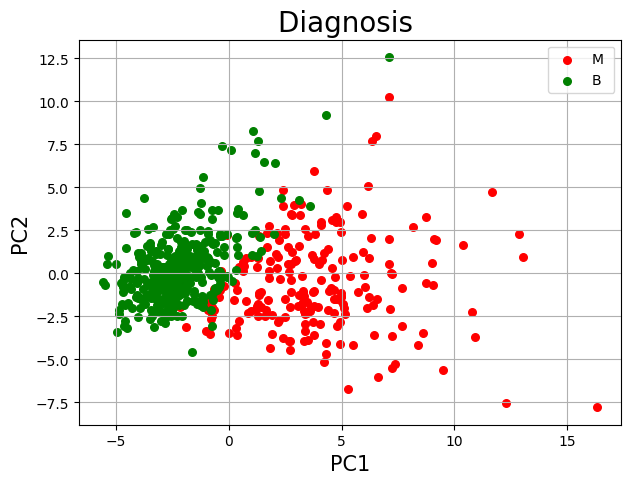

In [11]:


def plot_pca(dataframe, target):
    fig = plt.figure(figsize=(7, 5))
    ax = fig.add_subplot(1, 1, 1)
    ax.set_xlabel('PC1', fontsize=15)
    ax.set_ylabel('PC2', fontsize=15)
    ax.set_title(f'{target.capitalize()} ', fontsize=20)

    # Definir manualmente cores e labels
    label_map = {0: "B ", 1: "M "}
    color_map = {0: "green", 1: "red"}

    for t in dataframe[target].unique():
        indices = dataframe[target] == t
        ax.scatter(
            dataframe.loc[indices, 'PC1'],
            dataframe.loc[indices, 'PC2'],
            c=color_map[t],
            s=30,
            label=label_map[t]
        )
    ax.legend()
    ax.grid()
    plt.show()

# chamada
plot_pca(pca_df, "diagnosis")


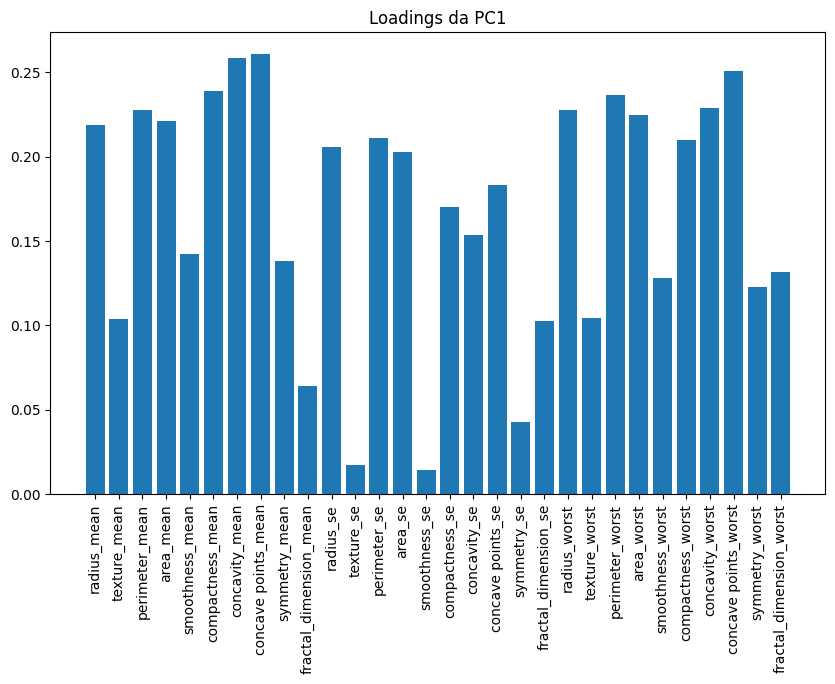

In [12]:
#contribution of each feature to each main component
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f"PC{i+1}" for i in range(pca.n_components_)],
    index=X.columns
)

#print(loadings)


plt.figure(figsize=(10,6))
plt.bar(X.columns, loadings['PC1'])
plt.xticks(rotation=90)
plt.title("Loadings da PC1")
plt.show()


The graph shows the loadings of the first principal component, i.e., the coefficients that indicate the degree of contribution of each variable to the construction of this component. PC1 represents the direction of greatest variance in the data and is therefore the most informative in terms of overall structure.

The variables with higher loadings are associated with the size and irregularity of tumour cells, suggesting that PC1 mainly captures morphological variations related to the size and shape of cell nuclei. This pattern is consistent with the distinction between benign and malignant tumours, with malignant tumours generally being larger and more irregular.

On the other hand, variables such as smoothness_se and texture_se have loadings close to zero, indicating a reduced contribution to PC1. These characteristics are less relevant in explaining the main variance in the data.

The results show that PC1 is strongly influenced precisely by the variables that also exhibit the highest correlation with the target variable. Therefore, the variables that best discriminate between malignant and benign tumours are also those that contribute most to the direction of greater variance captured by PC1. This validates the suitability of PCA for reducing dimensionality and reinforces its usefulness in visualising and interpreting relevant patterns in the data.

## t-SNE

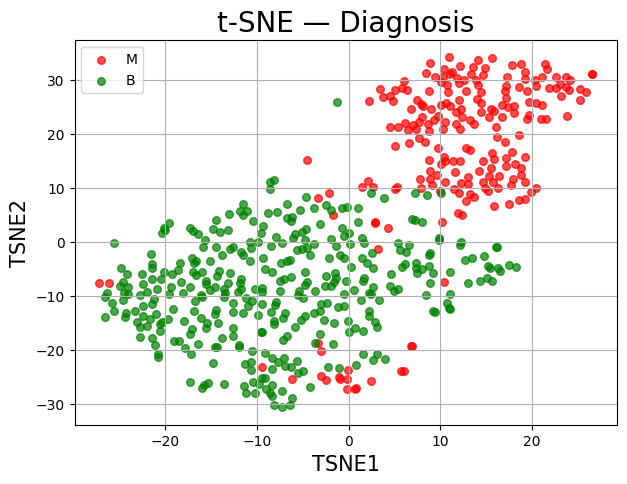

In [13]:

from sklearn.manifold import TSNE

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


def create_tsne_df(X, y, perplexity=30, learning_rate=200, max_iter=1500, random_state=42):
    tsne = TSNE(
        n_components=2,
        perplexity=perplexity,
        learning_rate=learning_rate,
        max_iter=max_iter,
        random_state=random_state,
        init='pca'
    )

    tsne_fit = tsne.fit_transform(X)
    tsne_df = pd.DataFrame(tsne_fit, columns=['TSNE1', 'TSNE2'])
    final_df = pd.concat([tsne_df, pd.DataFrame(y, columns=['diagnosis'])], axis=1)

    return final_df

tsne_df = create_tsne_df(X_scaled, y)


def plot_tsne(dataframe, target):
    plt.figure(figsize=(7, 5))
    ax = plt.gca()
    ax.set_xlabel('TSNE1', fontsize=15)
    ax.set_ylabel('TSNE2', fontsize=15)
    ax.set_title(f't-SNE — {target.capitalize()}', fontsize=20)


    color_map = {1: "red", 0: "green"}


    label_map = {1: "M", 0: "B"}


    targets = list(dataframe[target].unique())
    for t in targets:
        indices = dataframe[target] == t
        ax.scatter(
            dataframe.loc[indices, 'TSNE1'],
            dataframe.loc[indices, 'TSNE2'],
            c=color_map[t],
            s=30,
            alpha=0.7,
            label=label_map[t]
        )

    ax.legend()
    ax.grid()
    plt.show()

plot_tsne(tsne_df, "diagnosis")


t-SNE provided a clearer visualization of the differences between benign and malignant tumors in this breast cancer dataset. However, it is important to note that t-SNE and PCA should not be directly compared: while PCA is a linear method that captures only part of the data variability, t-SNE is a non-linear dimensionality reduction technique designed to preserve local relationships, offering a distinct visual representation.


## Question



**"Is it possible to obtain a visual representation using dimensionality reduction techniques (PCA and t-SNE) in order to effectively identify the distinction between Malignant and Benign disease patterns, optimizing the diagnostic process?"**


The comparative analysis between PCA (Principal Component Analysis) and t-SNE (t-Distributed Stochastic Neighbor Embedding) projections demonstrates that dimensionality reduction is a critical methodology for the exploratory inspection of multivariate data, such as that derived from oncology research.

The t-SNE plot reveals the intrinsic structure of the data in a particularly explicit and clean manner, transforming a space unfeasible for visualization into a 2D representation that strongly suggests the existence of two distinct patterns (Benign and Malignant).

The observation of the accentuated separation between clusters (red/Malignant and green/Benign) serves as a strong initial visual validation of the features' relevance. This indicates that the original biological or clinical characteristics of the dataset possess significant discriminatory power, confirming their utility for the classification problem. Furthermore, in the applied context, the ability to map a new patient's characteristic profile onto this visually interpretable space offers objective and rapid support for decision-making. The location of a case within a specific cluster reinforces the inferred prognosis, contributing to the efficiency of screening protocols and accelerating the intervention process.

In summary, dimensionality reduction converts abstract mathematical relationships into accessible structural information. Although the plots do not constitute definitive diagnostic proof, they provide a valuable insight into the fundamental organization of the disease, guiding subsequent research and enhancing the reliability of clinical decision support tools.

## 9. Analysis of Example 2 [3,0 valor]




In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import warnings

# Suppress GridSearchCV warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# Global settings
pd.set_option('display.max_columns', None)
np.random.seed(42)

# PRE-PROCESSING AND SCALING
y = df['diagnosis']
X = df.drop(['diagnosis'], axis=1)
X_scaled = StandardScaler().fit_transform(X)


# PCA: KAISER'S CRITERION
print("Determining the number of components using Kaiser's criterion:")
# Apply PCA without limiting the number of components to obtain the eigenvalues
pca_kaiser = PCA()
pca_kaiser.fit(X_scaled)

# The Kaiser criterion selects components with eigenvalue (explained variance) > 1.
explained_variance = pca_kaiser.explained_variance_
N_COMPONENTS_KAISER = np.sum(explained_variance > 1)

#print(f"  Eigenvalues (Explained Variance) of the first 10 components:")
#print(f"   {[f'{v:.2f}' for v in explained_variance[:10]]}...")

# Ensure that at least 1 component is selected
if N_COMPONENTS_KAISER == 0:
    N_COMPONENTS_KAISER = 1
    print("   No eigenvalues > 1 found. Using N_COMPONENTS = 1.")

print(f"  {N_COMPONENTS_KAISER} components have eigenvalue > 1.")


# APPLICATION OF THE PCA AND DIVISION
print(f"Applying PCA with  {N_COMPONENTS_KAISER} Components...")
pca_final = PCA(n_components=N_COMPONENTS_KAISER)
X_pca = pca_final.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.20, random_state=42, stratify=y
)


# RANDOM FOREST: GRID SEARCH (OPTIMISATION)
print("\nPerforming Grid Search (RF Optimisation) with Cross-Validation...")

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [5, 7, 10],
    'min_samples_leaf': [2, 5, 10]
}

#  Use class_weight=“balanced” to handle possible class imbalance
rf = RandomForestClassifier(random_state=42, class_weight='balanced')

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='f1_macro',
    cv=skf,
    verbose=0,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("\n" + "="*50)
print(f"Optimisation Results (RF, PCA - {N_COMPONENTS_KAISER} Components):")
print(f"Best hyperparameters found: {best_params}")
print(f"Best Score (CV - F1 Macro): {grid_search.best_score_:.4f}")



# FINAL EVALUATION IN THE TEST SET
print("\n==========================================================")
print("      FINAL EVALUATION IN THE TEST SET (Optimised Model)")
print("============================================================")


POS_LABEL_NUMERIC = 1

y_pred_opt = best_model.predict(X_test)

# Calculate metrics
accuracy_opt = accuracy_score(y_test, y_pred_opt)
precision_opt = precision_score(y_test, y_pred_opt, pos_label=POS_LABEL_NUMERIC)
recall_opt = recall_score(y_test, y_pred_opt, pos_label=POS_LABEL_NUMERIC)
f1_opt = f1_score(y_test, y_pred_opt, pos_label=POS_LABEL_NUMERIC)
conf_matrix_opt = confusion_matrix(y_test, y_pred_opt)


conf_df_opt = pd.DataFrame(conf_matrix_opt,
                           index=['Real Benigno', 'Real Maligno'],
                           columns=['Predito Benigno', 'Predito Maligno'])

print(f"Accuracy: {accuracy_opt:.4f}")
print(f"Precision (Maligno): {precision_opt:.4f}")
print(f"Recall : {recall_opt:.4f}")
print(f"F1-Score (Maligno): {f1_opt:.4f}")
print("\n--- Optimised Confusion Matrix ---")
print(conf_df_opt)


#  FINAL EVALUATION WITH FULL CROSS-VALIDATION

# Create the final model with the best hyperparameters
final_model = RandomForestClassifier(**best_params, random_state=42, class_weight='balanced')

#  Perform cross-validation on the COMPLETE PCA dataset (X_pca, y)
cv_results = cross_validate(
    estimator=final_model,
    X=X_pca,
    y=y,
    cv=skf,
    scoring=['accuracy', 'precision_macro', 'recall_macro', 'f1_macro'],
    n_jobs=-1,
    return_train_score=False
)

# Calculate the averages of the test metrics
mean_accuracy = cv_results['test_accuracy'].mean()
mean_precision = cv_results['test_precision_macro'].mean()
mean_recall = cv_results['test_recall_macro'].mean()
mean_f1 = cv_results['test_f1_macro'].mean()


print("\n=================================================================================")
print(" Final Evaluation of the Optimised Model with Cross-Validation (Average Metrics) ")
print("===================================================================================")
print(f"Average CV Accuracy: {mean_accuracy:.4f}")
print(f"Average CV Precision (Macro): {mean_precision:.4f}")
print(f"Average CV Recall (Macro): {mean_recall:.4f}")
print(f"Average CV F1-Score (Macro): {mean_f1:.4f}")


Determining the number of components using Kaiser's criterion:
  6 components have eigenvalue > 1.
Applying PCA with  6 Components...

Performing Grid Search (RF Optimisation) with Cross-Validation...

Optimisation Results (RF, PCA - 6 Components):
Best hyperparameters found: {'max_depth': 5, 'min_samples_leaf': 2, 'n_estimators': 500}
Best Score (CV - F1 Macro): 0.9623

      FINAL EVALUATION IN THE TEST SET (Optimised Model)
Accuracy: 0.9386
Precision (Maligno): 0.9268
Recall : 0.9048
F1-Score (Maligno): 0.9157

--- Optimised Confusion Matrix ---
              Predito Benigno  Predito Maligno
Real Benigno               69                3
Real Maligno                4               38

 Final Evaluation of the Optimised Model with Cross-Validation (Average Metrics) 
Average CV Accuracy: 0.9508
Average CV Precision (Macro): 0.9504
Average CV Recall (Macro): 0.9475
Average CV F1-Score (Macro): 0.9471


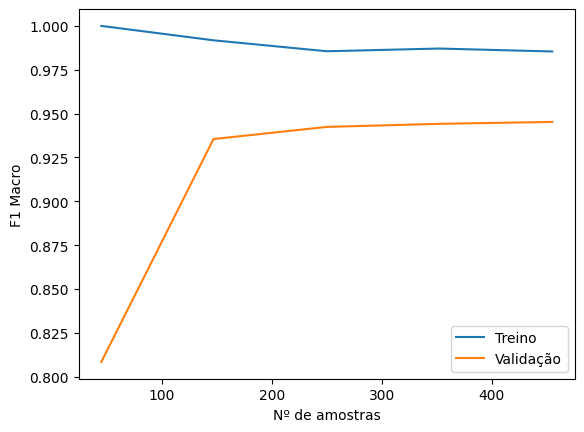

In [15]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(
    final_model, X_pca, y, cv=skf, scoring='f1_macro', n_jobs=-1
)

# calcular médias
train_mean = train_scores.mean(axis=1)
val_mean = val_scores.mean(axis=1)

plt.plot(train_sizes, train_mean, label="Treino")
plt.plot(train_sizes, val_mean, label="Validação")
plt.legend()
plt.xlabel("Nº de amostras")
plt.ylabel("F1 Macro")
plt.show()

**NOTE**: The results obtained in the Random Forest model after applying PCA show very high performance metrics, both in the training set (through cross-validation) and in the independent test set. At first glance, high values may raise suspicions of overfitting, i.e., that the model is memorising the data rather than generalising. However, there are several reasons that indicate that this is not happening:

The average cross-validation performance (F1 ≈ 0.947) is very close to the performance on the test set (F1 ≈ 0.916), suggesting that the model generalises well to unseen data;

Cross-validation with stratification ensures that each fold maintains the proportion of classes, reduces the risk of results inflated by unbalanced distributions, and increases the robustness of the evaluation;

The optimised hyperparameters (max_depth=5, min_samples_leaf=2) limit the depth of the trees and prevent the model from becoming overly complex;

The dataset used is known to have a relatively clear separation between benign and malignant classes. This means that well-fitted models can achieve high performance without necessarily overfitting.

Thus, high values reflect more the quality of the dataset and the adequacy of the model than an overfitting problem.

In addition to these metrics, we plot the learning curve generated for the Random Forest model after applying PCA, which provides further evidence of the model's generalisation ability. The curve plots the F1 Macro score for the training and validation sets as a function of the number of training samples. Initially, the training score is close to 1.0, as expected when the model is exposed to a small subset of data. As the number of samples increases, the training score decreases slightly, while the validation score increases significantly and stabilises near 0.94.

This convergence between the training and validation curves is a strong indicator that the model is not being overfitted. The decreasing difference between the two curves demonstrates that the model benefits from more data and maintains consistent performance on unseen samples.

Together, the performance metrics and learning curve reinforce the conclusion that the model is robust, well calibrated, and suitable for predictive tasks in this context.

##Question

**Is it possible to reliably predict whether a person has a benign or malignant tumor based on the available variables?**

The model achieved an average accuracy of 95.08% and an F1-Score Macro of 0.9471, which guarantees a robust balance between the precision of predictions and the sensitivity in case identification.
The PCA technique proved to be a crucial factor for this success. By transforming the 30 original variables and retaining only 6 principal components (based on the Kaiser Criterion), PCA eliminated redundancy and noise, resulting in a model that is not only highly accurate but also stable and generalizable, as substantiated by the Mean Cross-Validation (CV) F1-Score Macro of 0.9471.

Despite the notable performance, it is imperative to analyze the risk inherent in False Negatives (FN), which totaled 4 cases in the test set. This error is the most serious in a clinical context, as it represents a failure to identify a malignant tumor, classifying it incorrectly as benign. The risk associated with this failure is directly quantified by the Recall (Sensitivity) metric, which reached 0.9048 (90.48%) for the Malignant class.

The model possesses the potential to predict the diagnosis robustly and reliably. However, the presence of False Negatives (though low) imposes a fundamental constraint on its clinical application: The model should be used strictly as a diagnostic decision support tool and never as an autonomous substitute for a specialist. The high Precision of the model (0.9268) instills great confidence in its "Malignant" prediction (acting as an alert system). However, due to the risk quantified by the Recall, a "Benign" prediction must always be confirmed by a qualified pathologist.

## 10. Pros and cons of the approach [2,0 valor]

PROS:

Combating Overfitting and Noise Reduction: Dimensionality reduction (PCA or t-SNE) acts as a powerful pre-processing step, removing redundancy and statistical noise.

Efficiency and Scalability: Reducing 30 features to 6 accelerates the training of the Random Forest, making the model more efficient in terms of calculation time and memory, which is especially useful for large datasets.

Visualization: It allows plotting the separation of classes (Malignant vs. Benign) in 2D, which is essential for Exploratory Data Analysis (EDA).

Classifier Robustness: The Random Forest is intrinsically robust, handles non-linearity well, and allows the use of class_weight='balanced' to deal with class imbalance (protecting clinical Recall).

The use of PCA and t-SNE allows us to understand the dataset from multiple perspectives. Even though t-SNE is not used directly in the model, it offers valuable insights into the intrinsic separability of classes.

CONS:

Information Loss (PCA): PCA discards the variance not captured in the selected components (you retained 6 PCs, but lost 11.24% of the information). If the remaining information is critical for differentiating difficult diagnostic cases, the model may make errors.

Unlike PCA, t-SNE is computationally demanding. Applying it to larger datasets can slow down preprocessing and hinder reproducibility.





## 11. Future improvements [2,0 valor]

Compare the performance of PCA-RF with a Random Forest trained directly on the 30 original variables, checking whether there is any relevant difference. If the results are similar, the model with the 30 features may be preferred due to its greater interpretability.

Explore other algorithms such as SGBoost, SVM, and Neural Networks to assess whether they provide additional performance gains or capture patterns that Random Forest cannot, serving as benchmark alternatives and possible extensions of the work.

Evaluate the impact of using different numbers of principal components to understand how performance varies with the level of information preserved.

Consider the importance of features or SHAP values in the full-dimension model as a way to identify clinically relevant variables that may be lost in PCA reductions.


# 12 References [1,0 valor]

[1] Pearson, K. (1901). *On Lines and Planes of Closest Fit to Systems of Points in Space*. https://doi.org/10.1080/14786440109462720

[2] Hotelling, H. (1933). *Analysis of a complex of statistical variables into principal components*. https://doi.org/10.1037/h0071325

[3] van der Maaten, L. J. P., & Hinton, G. E. (2008). *Visualizing Data using t-SNE*. https://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf

[4] Breiman, L. (2001). *Random Forests*. https://doi.org/10.1023/A:1010933404324

[5] Jolliffe, I. T. (2002). *Principal Component Analysis*. https://doi.org/10.1007/b98835

[6] Abdi, H., & Williams, L. J. (2010). *Principal component analysis*. https://wires.onlinelibrary.wiley.com/doi/10.1002/wics.101

[7] Wattenberg, M., Viégas, F., & Johnson, I. (2016). *How to Use t-SNE Effectively*. https://distill.pub/2016/misread-tsne/
